# Links  
[Understanding the Mel Spectrogram](https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53)  
[Audio Deep Learning Made Simple (Part 1): State-of-the-Art Techniques](https://towardsdatascience.com/audio-deep-learning-made-simple-part-1-state-of-the-art-techniques-da1d3dff2504)  
[Audio Deep Learning Made Simple (Part 2): Why Mel Spectrograms perform better](https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505)  
[Audio Deep Learning Made Simple (Part 3): Data Preparation and Augmentation](https://towardsdatascience.com/audio-deep-learning-made-simple-part-3-data-preparation-and-augmentation-24c6e1f6b52)

**Signals**  
A signal is a variation in a certain quantity over time. For audio, the quantity that varies is air pressure. How do we capture this information digitally? We can take samples of the air pressure over time. *The rate at which we sample the data can vary, but is most commonly 44.1kHz, or 44,100 samples* per second. What we have captured is a waveform for the signal, and this can be interpreted, modified, and analyzed with computer software.

**What is sound?**  
We all remember from school that a sound signal is produced by variations in air pressure. We can measure the intensity of the pressure variations and plot those measurements over time.
Sound signals often repeat at regular intervals so that each wave has the same shape. *The height shows the intensity of the sound and is known as the amplitude*. 

<img style="float: center;" src="https://miro.medium.com/max/506/1*7cuJJ-zV6pWA3Ping9AygA.png" />  

The time taken for the signal to *complete one full wave is the period*. The *number of waves made by the signal in one second is called the frequency*. The *frequency is the reciprocal of the period*. The unit of frequency is Hertz.  

  The majority of sounds we encounter may not follow such simple and regular periodic patterns. But signals of different frequencies can be added together to create composite signals with more complex repeating patterns. All sounds that we hear, including our own human voice, consist of waveforms like these. For instance, this could be the sound of a musical instrument.  

![Musical waveform with a complex repeating signal](https://miro.medium.com/max/1050/1*wm5JVpeqcqw3cKxdBNa3ng.jpeg#center)  

**How do we represent sound digitally?**  

To digitize a sound wave we must turn the signal into a series of numbers so that we can input it into our models. This is done by measuring the amplitude of the sound at fixed intervals of time.  

<img style="float: center;" src="https://miro.medium.com/max/1050/1*sSy2DlUoJx27zzpQax0aeg.jpeg" />   

Each such measurement is called a sample, and the sample rate is the number of samples per second. For instance, a common sampling rate is about 44,100 samples per second. That means that a 10-second music clip would have 441,000 samples!  




**Spectrum**  

  As we discussed earlier, signals of different frequencies can be added together to create composite signals, representing any sound that occurs in the real-world. This means that any signal consists of many distinct frequencies and can be expressed as the sum of those frequencies.  

The Spectrum is the set of frequencies that are combined together to produce a signal. eg. the picture shows the spectrum of a piece of music.
The Spectrum plots all of the frequencies that are present in the signal along with the strength or amplitude of each frequency.  

<img style="float: center;" src="https://miro.medium.com/max/780/1*yfJw9Jgf5c-bUQi9vWxaCQ.jpeg"/>  

The lowest frequency in a signal called the fundamental frequency. Frequencies that are whole number multiples of the fundamental frequency are known as harmonics.  

For instance, if the fundamental frequency is 200 Hz, then its harmonic frequencies are 400 Hz, 600 Hz, and so on.  


**Time Domain vs Frequency Domain**  

The waveforms that we saw earlier showing Amplitude against Time are one way to represent a sound signal. Since the x-axis shows the range of time values of the signal, we are viewing the signal in the Time Domain.  
*The Spectrum is an alternate way to represent the same signal*. It shows Amplitude against Frequency, and since the x-axis shows the range of frequency values of the signal, at a moment in time, we are viewing the signal in the Frequency Domain.  

<img style="float: center;" src="https://miro.medium.com/max/810/1*4QTvJNX2XsQlSJQQXbFLDg.png"/>  


**Audio Deep Learning Models**  

Now that we understand what a Spectrogram is, we realize that it is an equivalent compact representation of an audio signal, somewhat like a ‘fingerprint’ of the signal. It is an elegant way to capture the essential features of audio data as an image.  


<img style="float: center;" src="https://miro.medium.com/max/1050/1*rBUXN2u1Yh-9pxKzUGjmMg.png"/> 
  

Typical pipeline used by audio deep learning models (Image by Author)  

So most deep learning audio applications use Spectrograms to represent audio. They usually follow a procedure like this:  

1. Start with raw audio data in the form of a wave file.
2. Convert the audio data into its corresponding spectrogram.
3. Optionally, use simple audio processing techniques to augment the spectrogram data. (Some augmentation or cleaning can also be done on the raw audio data before the spectrogram conversion)
4. Now that we have image data, we can use standard CNN architectures to process them and extract feature maps that are an encoded representation of the spectrogram image.  

The next step is to generate output predictions from this encoded representation, depending on the problem that you are trying to solve.  

1. For instance, for an audio classification problem, you would pass this through a Classifier usually consisting of some fully connected Linear layers.
2. For a Speech-to-Text problem, you could pass it through some RNN layers to extract text sentences from this encoded representation.


In [1]:
import os
import time
import librosa
import sklearn
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# Change directory
os.chdir('/gdrive/MyDrive/kaggle/sample_audio_data')

In [4]:
# Check current location, '/content' is the Colab virtual machine
os.getcwd(), os.listdir()

('/gdrive/MyDrive/kaggle/sample_audio_data',
 ['44957_COR_20190923.ogg',
  '11254_COR_20190904.ogg',
  'XC131193.ogg',
  'XC197247.ogg',
  '11254_COR_20190904.ogg.zip',
  '44957_COR_20190923.ogg.zip',
  'XC109605.ogg'])

Librosa’s **load** function will read in the path to an audio file, and return a tuple with two items. 
- The first item is an ‘audio time series’(type: array) corresponding to audio track. 
- The second item in the tuple is the sampling rate that was used to process the audio. Eg:

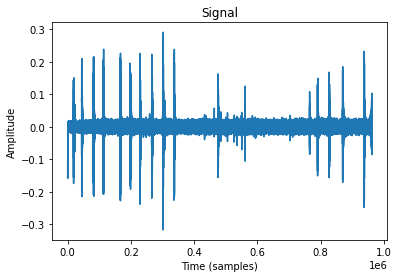

In [5]:
y, sr = librosa.load('XC131193.ogg')

plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

In [8]:
sr

22050

In [ ]:
print(y.shape)

(962233,)


In [ ]:
print(sr)

22050


The default sampling rate used by Librosa is 22050, but we can pass in almost any sampling rate we like.  
   Beware: resampling may add a non-negligible amount of run time for the load function(depending on our task)

In [ ]:
# New Sample Rate
start = time.clock()
test_array_default, test_array_sr = librosa.load('XC131193.ogg', sr=11000)
print(time.clock()-start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


1.8067020000000298


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [ ]:
test_array_sr

11000


```
We have a digital representation of an audio signal that we can work with.
```





**The Fourier Transform**  


An audio signal is comprised of several single-frequency sound waves. When taking samples of the signal over time, we only capture the resulting amplitudes. The Fourier transform is a mathematical formula that allows us to decompose a signal into it’s individual frequencies and the frequency’s amplitude. In other words, it converts the signal from the time domain into the frequency domain. The result is called a spectrum.  

<img style="float: center;" src="https://miro.medium.com/max/875/1*xTYCtcx_7otHVu-uToI9dA.png"/>  


**The fast Fourier transform (FFT)** is an algorithm that can efficiently compute the Fourier transform. It is widely used in signal processing. I will use this algorithm on a windowed segment of our example audio.

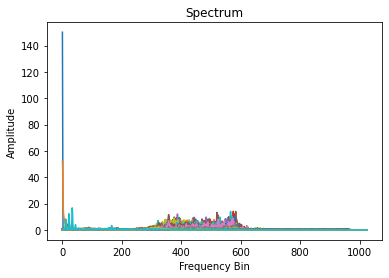

In [ ]:
n_fft = 12

ft = np.abs(librosa.stft(y, hop_length = 1024))

plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

**The Spectrogram**  

The fast Fourier transform is a powerful tool that allows us to analyze the frequency content of a signal, but what if our signal’s frequency content varies over time?   

  Such is the case with most audio signals such as music and speech. These signals are known as non periodic signals. We need a way to represent the spectrum of these signals as they vary over time.  `You may be thinking, “hey, can’t we compute several spectrums by performing FFT on several windowed segments of the signal?” Yes! This is exactly what is done, and it is called the short-time Fourier transform.`   
  The FFT is computed on overlapping windowed segments of the signal, and we get what is called the spectrogram. A good visual is in order.  

<img style="float: center;" src="https://miro.medium.com/max/875/1*tIBRdtG3EfjmSIlraWVIxw.png"/>  

`You can think of a spectrogram as a bunch of FFTs stacked on top of each other.` It is a way to visually represent a signal’s loudness, or amplitude, as it varies over time at different frequencies. There are some additional details going on behind the scenes when computing the spectrogram. `The y-axis is converted to a log scale, and the color dimension is converted to decibels (you can think of this as the log scale of the amplitude).` This is because humans can only perceive a very small and concentrated range of frequencies and amplitudes.

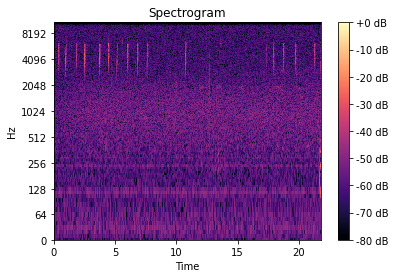

In [ ]:
spec = np.abs(librosa.stft(y, hop_length=1024))
spec = librosa.amplitude_to_db(spec, ref=np.max)

librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');

plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

**The Mel Scale**  

   `Studies have shown that humans do not perceive frequencies on a linear scale. We are better at detecting differences in lower frequencies than higher frequencies. For example, we can easily tell the difference between 500 and 1000 Hz, but we will hardly be able to tell a difference between 10,000 and 10,500 Hz, even though the distance between the two pairs are the same.`  

In 1937, Stevens, Volkmann, and Newmann proposed a unit of pitch such that equal distances in pitch sounded equally distant to the listener. This is called the mel scale. We perform a mathematical operation on frequencies to convert them to the mel scale.  


<img style="float: center;" src="https://miro.medium.com/max/445/1*erUKb2-Z-Wi_u8JWel6cDQ.gif"/>    


**How do humans hear frequencies?**  

The way we hear frequencies in sound is known as ‘pitch’. It is a subjective impression of the frequency. So a high-pitched sound has a higher frequency than a low-pitched sound. Humans do not perceive frequencies linearly. We are more sensitive to differences between lower frequencies than higher frequencies.  

For instance, if you listened to different pairs of sound as follows:
- 100Hz and 200Hz
- 1000Hz and 1100Hz
- 10000Hz and 10100 Hz  

**What is your perception of the “distance” between each pair of sounds? Are you able to tell each pair of sounds apart?**  

Even though in all cases, the actual frequency difference between each pair is exactly the same at 100 Hz, the pair at 100Hz and 200Hz will sound further apart than the pair at 1000Hz and 1100Hz. And you will hardly be able to distinguish between the pair at 10000Hz and 10100Hz.  

However, this may seem less surprising if we realize that the 200Hz frequency is actually double the 100Hz, whereas the 10100Hz frequency is only 1% higher than the 10000Hz frequency.  

This is how humans perceive frequencies. We hear them on a logarithmic scale rather than a linear scale. How do we account for this in our data?   





**How do humans hear amplitudes?**
The human perception of the amplitude of a sound is its loudness. And similar to frequency, we hear loudness logarithmically rather than linearly. We account for this using the Decibel scale.  

**Decibel Scale**  
`On this scale, 0 dB is total silence.` From there, measurement units increase exponentially. 10 dB is 10 times louder than 0 dB, 20 dB is 100 times louder and 30 dB is 1000 times louder. On this scale, a sound above 100 dB starts to become unbearably loud.  

<img style="float: center;" src="https://miro.medium.com/max/614/1*8dpySHVuqZ_21Ke9643vRw.png"/> 

**Decibel levels of common sounds (Adapted from Source)**  

We can see that, to deal with sound in a realistic manner, it is important for us to use a **logarithmic scale via the Mel Scale and the Decibel Scale when dealing with Frequencies and Amplitudes in our data**.
That is exactly what the Mel Spectrogram is intended to do.

**The Mel Spectrogram**  

A Mel Spectrogram makes two important changes relative to a regular Spectrogram that plots Frequency vs Time.  
- It uses the Mel Scale instead of Frequency on the y-axis.
- It uses the Decibel Scale instead of Amplitude to indicate colors.  
For deep learning models, we usually use this rather than a simple Spectrogram

In [ ]:
# Converted the y-axis (frequency) to a log scale.

mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)

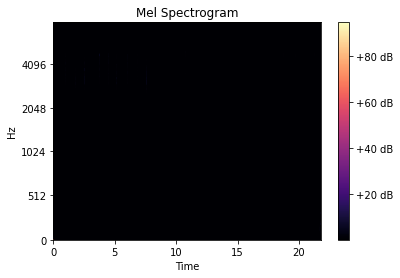

In [ ]:
# Mapped the y-axis (frequency) onto the mel scale to form the mel spectrogram.

librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

This is better than before, but most of the spectrogram is still dark and not carrying enough useful information. So let’s modify it to use the Decibel Scale instead of Amplitude.

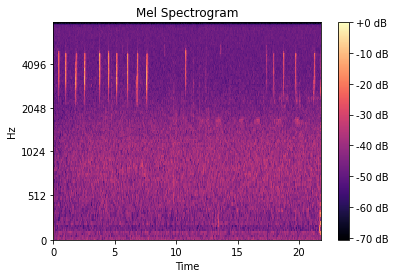

In [ ]:
# the color dimension (amplitude) to decibels to form the spectrogram.
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

In [ ]:
!ls

11254_COR_20190904.ogg.zip  XC109605.ogg  XC197247.ogg
44957_COR_20190923.ogg.zip  XC131193.ogg


In [ ]:
!unzip -q 11254_COR_20190904.ogg.zip

In [ ]:
!unzip -q 44957_COR_20190923.ogg.zip

In [ ]:
!ls

11254_COR_20190904.ogg	    44957_COR_20190923.ogg.zip	XC197247.ogg
11254_COR_20190904.ogg.zip  XC109605.ogg
44957_COR_20190923.ogg	    XC131193.ogg


In [ ]:
Audio('XC131193.ogg')

In [ ]:
Audio('XC109605.ogg')

In [ ]:
Audio('XC197247.ogg')

In [ ]:
Audio('11254_COR_20190904.ogg')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Audio('44957_COR_20190923.ogg')

Output hidden; open in https://colab.research.google.com to view.

# Spectrograms Optimization with Hyper-parameter tuning

****************************
**How Spectrograms are constructed?**  
****************************  


**Fast Fourier Transform (FFT)**  

One way to compute Fourier Transforms is by using a technique called DFT (Discrete Fourier Transform). The DFT is very expensive to compute, so in practice, the FFT (Fast Fourier Transform) algorithm is used, which is an efficient way to implement the DFT.  

However, *the FFT will give you the overall frequency components for the entire time series of the audio signal as a whole*. It won’t tell you how those frequency components change over time within the audio signal. You will not be able to see, for example, that the first part of the audio had high frequencies while the second part had low frequencies, and so on.  



**Short-time Fourier Transform (STFT)**  

   To get that more granular view and see the frequency variations over time, we use the STFT algorithm (**Short-Time Fourier Transform**).  
   The STFT is another variant of the Fourier Transform that **breaks up the audio signal into smaller sections by using a sliding time window. It takes the FFT on each section and then combines them**. It is thus able to capture the variations of the frequency with time.

<img style="float: center;" src="https://miro.medium.com/max/875/1*tIBRdtG3EfjmSIlraWVIxw.png"/>  


This splits the signal into sections along the Time axis. Secondly, it also splits the signal into sections along the Frequency axis. It takes the full range of frequencies and divides it up into equally spaced bands (in the Mel scale). Then, for each section of time, it calculates the Amplitude or energy for each frequency band.

In [ ]:
#Spectrogram is a 2D numpy array
print(type(mel_spect), mel_spect.shape)

<class 'numpy.ndarray'> (128, 940)


Let’s make this clear with an example.  
    We have a 1-minute audio clip that contains frequencies between 0Hz and 10000 Hz (in the Mel scale). Let’s say that the Mel Spectrogram algorithm:  

- Chooses windows such that it splits our audio signal into 20 time-sections.
- Decides to split our frequency range into 10 bands (ie. 0–1000Hz, 1000–2000Hz, … 9000–10000Hz).  
The final output of the algorithm is a 2D Numpy array of shape (10, 20) where:  
- Each of the 20 columns represents the FFT for one time-section.
- Each of the 10 rows represents Amplitude values for a frequency band.  

Let’s take the first column, which is the FFT for the first time section. It has 10 rows.
- The first row is the Amplitude for the first frequency band between 0–1000 Hz.
- The second row is the Amplitude for the second frequency band between 1000–2000 Hz.
- … and so on.  

Each column in the array becomes a ‘column’ in our Mel Spectrogram image.

****************************  
**Mel Spectrogram Hyperparameters**  
****************************  
This gives us the hyperparameters for tuning our Mel Spectrogram. We’ll use the parameter names that Librosa uses. (Other libraries will have equivalent parameters)  

**Frequency Bands**
- **fmin** — minimum frequency
- **fmax** — maximum frequency to display
- **n_mels** — number of frequency bands (ie. Mel bins). This is the height of the Spectrogram.  

**Time Sections**  

- **n_fft** — window length for each time section
- **hop_length** — number of samples by which to slide the window at each step.   

Hence, the width of the Spectrogram is = Total number of samples / hop_length  

We can adjust these hyperparameters based on the type of audio data that you have and the problem you’re solving.

****************************
**MFCC (for Human Speech)**  
****************************  
Mel Spectrograms work well for most audio deep learning applications. However, **for problems dealing with human speech, like Automatic Speech Recognition, you might find that MFCC (Mel Frequency Cepstral Coefficients) sometimes work better**.  


These essentially *take Mel Spectrograms and apply a couple of further processing steps. This selects a compressed representation of the frequency bands from the Mel Spectrogram that correspond to the most common frequencies at which humans speak*.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


MFCC is of type <class 'numpy.ndarray'> with shape (20, 2728)


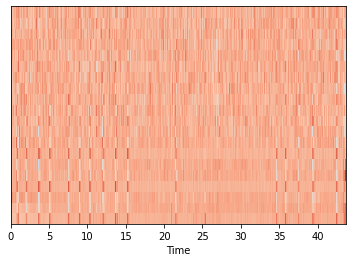

In [ ]:
# Load the audio file
samples, sample_rate = librosa.load('XC131193.ogg', sr=None)
mfcc = librosa.feature.mfcc(samples, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')
# MFCC is of type <class 'numpy.ndarray'> with shape (20, 134)

Above, we had seen that the Mel Spectrogram for this same audio had shape (128, 940), whereas the MFCC has shape (20, 2728). The MFCC extracts a much smaller set of features from the audio that are the most relevant in capturing the essential quality of the sound.

**Data Augmentation**  
A common technique to increase the diversity of your dataset, particularly when you don’t have enough data, is to augment your data artificially. We do this by modifying the existing data samples in small ways.  

For instance, with images, we might do things like rotate the image slightly, crop or scale it, modify colors or lighting, or add some noise to the image. 

  Since the semantics of the image haven’t changed materially, so the same target label from the original sample will still apply to the augmented sample. eg. if the image was labeled as a ‘cat’, the augmented image will also be a ‘cat’.  

But, from the model’s point of view, it feels like a new data sample. This helps your model generalize to a larger range of image inputs.  

  Just like with images, there are several techniques to augment audio data as well. This augmentation can be done both on the raw audio before producing the spectrogram, or on the generated spectrogram. Augmenting the spectrogram usually produces better results.

**Spectrogram Augmentation**  

The normal transforms you would use for an image don’t apply to spectrograms. For instance, a horizontal flip or a rotation would substantially alter the spectrogram and the sound that it represents.  

Instead, we use a method known as SpecAugment where we block out sections of the spectrogram. There are two flavors:  
- **Frequency mask** — randomly mask out a range of consecutive frequencies by adding horizontal bars on the spectrogram.  
- **Time mask** — similar to frequency masks, except that we randomly block out ranges of time from the spectrogram by using vertical bars.  



<img style="float: center;" src="https://miro.medium.com/max/1050/1*1h_Zy3w2Qjk-VmHS0dYZQg.png"/>   


**Raw Audio Augmentation**  

There are several options:
- Time Shift — shift audio to the left or the right by a random amount.
For sound such as traffic or sea waves which has no particular order, the audio could wrap around.  

<img style="float: center;" src="https://miro.medium.com/max/900/1*8sPjEehpVvWnmDu-Vc8p1A.png"/>  

Alternately, for sounds such as human speech where the order does matter, the gaps can be filled with silence.  
- Pitch Shift — randomly modify the frequency of parts of the sound.  


<img style="float: center;" src="https://miro.medium.com/max/900/1*_8-A1VTg7_ch0ZgcuktYfQ.png"/>    

Time Stretch — randomly slow down or speed up the sound.  


<img style="float: center;" src="https://miro.medium.com/max/900/1*W4NMyqyUHSU-Ni6wDuq1WA.png"/>  


Add Noise — add some random values to the sound.  

<img style="float: center;" src="https://miro.medium.com/max/900/1*tDZ4rjMl_w8U_hBDO4e_Qw.png"/>  









